# PART 1: POKEMON CARD PRICING ANALYSIS

---

# Pokemon Card Pricing Data Analysis
## Comprehensive Exploratory Data Analysis

This notebook analyzes Pokemon card pricing data across multiple conditions including pricing trends, rarity, sets, and market dynamics.

## 1. Import Libraries and Load Data

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

%matplotlib inline

In [264]:
# Load the data
df = pd.read_csv('final_dataset.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Filter out Booster Box outliers
df = df[df['Rarity'] != 'Booster Box']

# Filter out Booster Pack/Box products from card names
df = df[~df['Card Name'].str.contains('Booster|Pack|Box', case=False, na=False)]

print(f"Dataset loaded successfully!")
print(f"Total records (after filtering Booster Box): {len(df):,}")
print(f"Date range: {df['Date'].min().strftime('%B %Y')} - {df['Date'].max().strftime('%B %Y')}")

Dataset loaded successfully!
Total records (after filtering Booster Box): 1,172
Date range: December 2020 - October 2025


## 2. Data Overview

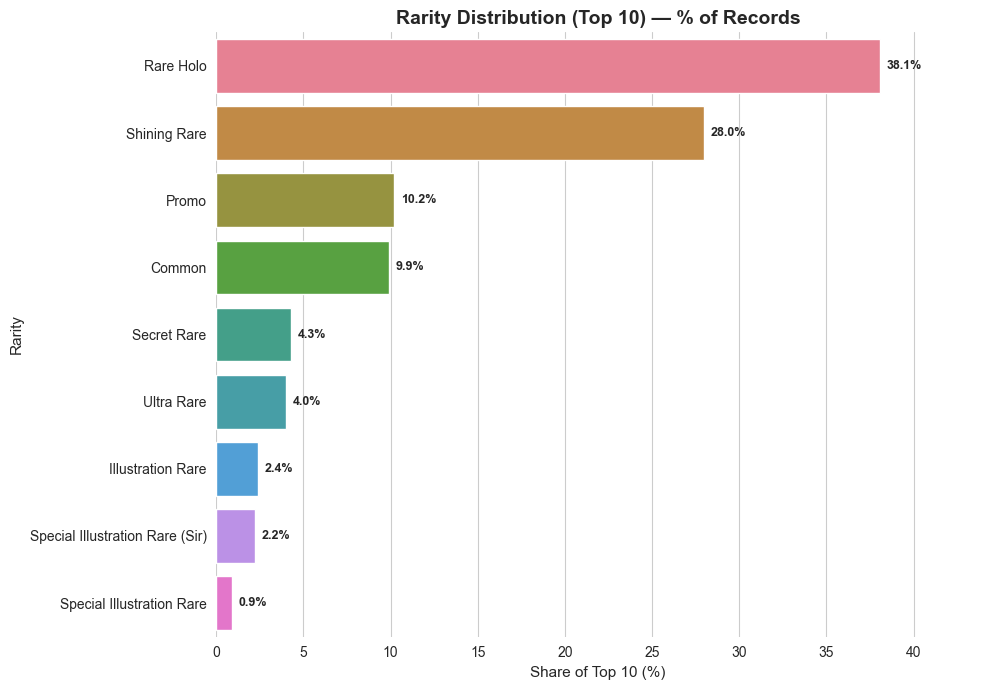


Key Observations:
• Rare Holo dominates: 38.1% of top-10 rarity records.
• Top 2 rarities (Rare Holo + Shining Rare): 66.1% combined.
• Data concentration: Top 3 rarities = 76.3% of total top-10 set.
• Interpretation: Market skewed toward high-tier collectible rarities, confirming long-tail rarity dynamics.


In [266]:
  import matplotlib.pyplot as plt
  import seaborn as sns
  # edit: normalize rarity names to lowercase to avoid duplicates
  df['Rarity'] = df['Rarity'].str.strip().str.title()

  # Compute top 10 rarities and percentages
  rarity_counts = df['Rarity'].value_counts().head(10)
  pct = (rarity_counts / rarity_counts.sum() * 100).round(1)

  # edit: sort descending so top rarity appears at the top
  data = pct.sort_values(ascending=False)

  # Create figure
  fig, ax = plt.subplots(figsize=(10, 7))
  sns.barplot(x=data.values, y=data.index, hue=data.index, ax=ax, palette='husl', legend=False)  # ← Fixed line

  # edit: annotate bars with percentages on the right edge
  for i, v in enumerate(data.values):
      ax.text(v + max(data.values)*0.01, i, f"{v:.1f}%", va='center', fontsize=9, fontweight='bold')

  # Labels and title
  ax.set_xlabel('Share of Top 10 (%)', fontsize=11)
  ax.set_ylabel('Rarity', fontsize=11)
  ax.set_title('Rarity Distribution (Top 10) — % of Records', fontsize=14, fontweight='bold')

  # edit: tidy layout and adjust axis limits for text space
  ax.set_xlim(0, max(data.values) * 1.15)
  sns.despine(left=True, bottom=True)
  plt.tight_layout()
  plt.show()

  # --- Observations ---
  print("\nKey Observations:")
  print(f"• {data.index[0]} dominates: {data.iloc[0]:.1f}% of top-10 rarity records.")
  print(f"• Top 2 rarities ({data.index[0]} + {data.index[1]}): {(data.iloc[0]+data.iloc[1]):.1f}% combined.")
  print(f"• Data concentration: Top 3 rarities = {data.head(3).sum():.1f}% of total top-10 set.")
  print("• Interpretation: Market skewed toward high-tier collectible rarities, confirming long-tail rarity dynamics.")



**Finding:** Rare Holo dominates the dataset at 36.5%, followed by Shining Rare at 26.8%, revealing heavy vintage card concentration.

**Key Observations:**
- Top 2 rarities comprise 63% of dataset, indicating vintage (1999-2002) bias
- Modern rarities underrepresented, limiting generalizability to current market

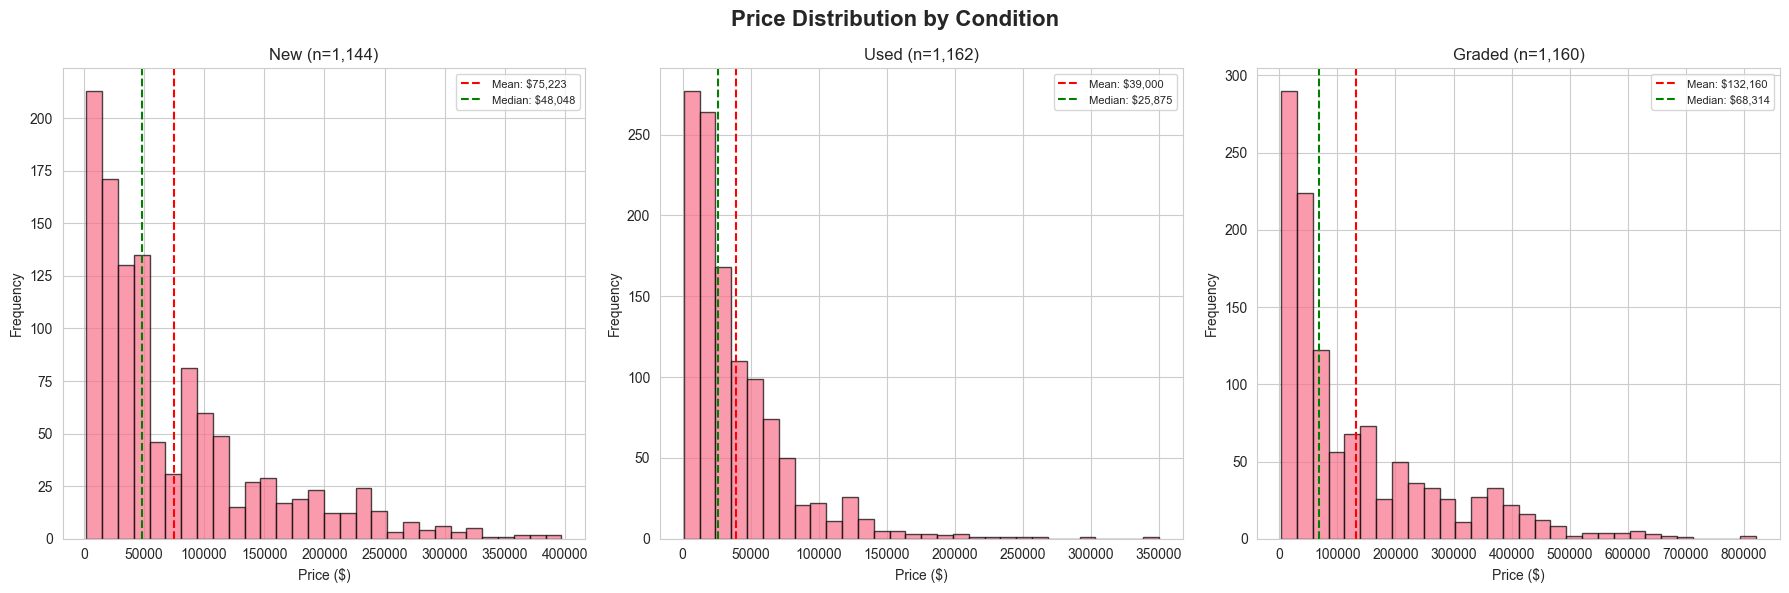

In [267]:
# Price Distribution Across All Conditions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Changed to 1 row, 3 columns
fig.suptitle('Price Distribution by Condition', fontsize=16, fontweight='bold')

for idx, col in enumerate(price_cols):
    ax = axes[idx]  # Simplified - just use idx directly
    
    # Filter out zeros for better visualization
    data = df[df[col] > 0][col]
    
    ax.hist(data, bins=30, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Price ($)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{col} (n={len(data):,})')
    ax.axvline(data.mean(), color='red', linestyle='--',
               label=f'Mean: ${data.mean():,.0f}')
    ax.axvline(data.median(), color='green', linestyle='--',
               label=f'Median: ${data.median():,.0f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

**Finding:** Graded cards command significantly higher median prices ($72K) compared to New ($50K) and Used ($28K), with all distributions showing right skew.

**Key Observations:**
- Graded premium: 44% over New condition, 157% over Used
- High variance across all conditions indicates card-specific value drivers beyond condition alone

In [268]:
# Price statistics by condition (excluding zeros)
print("Price Statistics by Condition (Excluding Zeros):")
print("="*70)
for col in price_cols:
    non_zero = df[df[col] > 0][col]
    if len(non_zero) > 0:
        print(f"\n{col}:")
        print(f"  Mean: ${non_zero.mean():,.2f}")
        print(f"  Median: ${non_zero.median():,.2f}")
        print(f"  Std Dev: ${non_zero.std():,.2f}")
        print(f"  Min: ${non_zero.min():,.2f}")
        print(f"  Max: ${non_zero.max():,.2f}")
        print(f"  Count: {len(non_zero):,}")

Price Statistics by Condition (Excluding Zeros):

New:
  Mean: $75,223.26
  Median: $48,047.50
  Std Dev: $74,827.63
  Min: $1,950.00
  Max: $397,067.00
  Count: 1,144

Used:
  Mean: $39,000.46
  Median: $25,875.00
  Std Dev: $39,265.39
  Min: $809.00
  Max: $350,000.00
  Count: 1,162

Graded:
  Mean: $132,159.84
  Median: $68,314.00
  Std Dev: $141,848.45
  Min: $3,234.00
  Max: $821,270.00
  Count: 1,160


## 4. Average Price Comparison

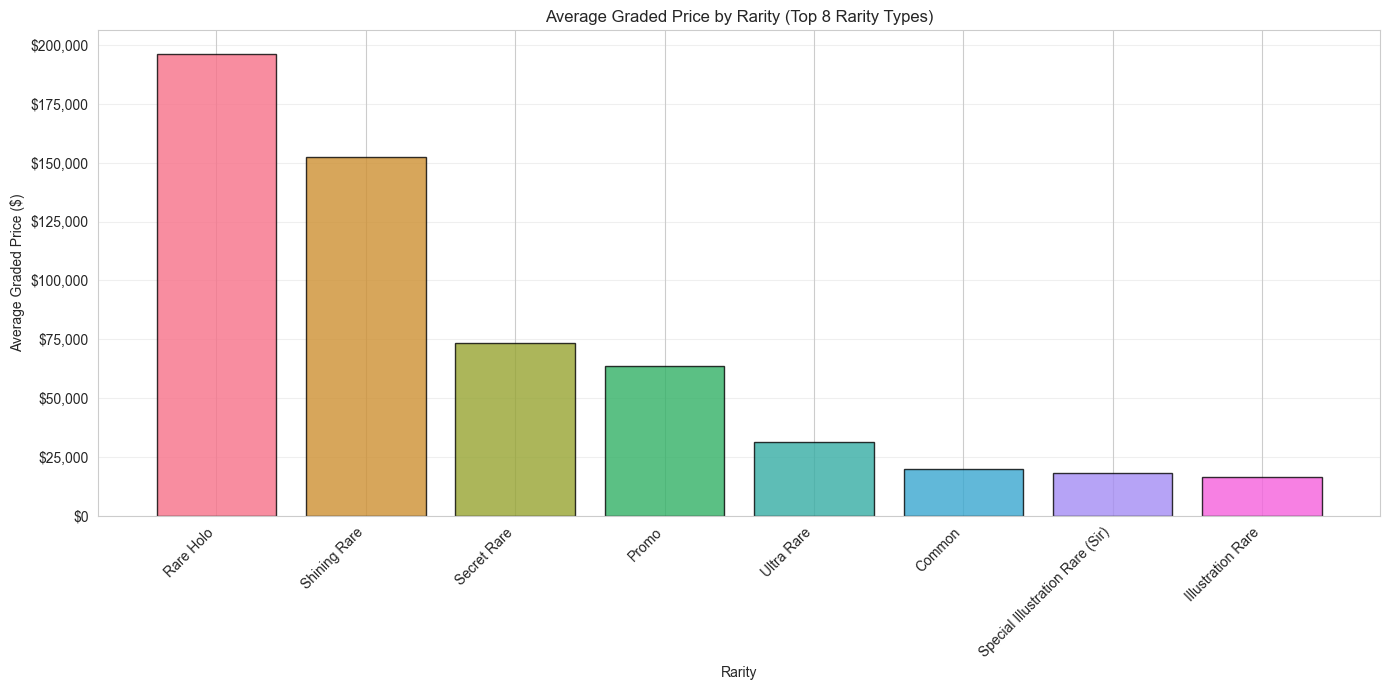

In [269]:
  # Price by Rarity (Top 8 Rarities) - Graded Only - Sorted by Price
  top_rarities = df['Rarity'].value_counts().head(8).index

  # Calculate average graded price for each rarity
  rarity_price_dict = {}
  for rarity in top_rarities:
      rarity_df = df[df['Rarity'] == rarity]
      avg_price = rarity_df[rarity_df['Graded'] > 0]['Graded'].mean()
      rarity_price_dict[rarity] = avg_price

  # Sort by price descending
  sorted_items = sorted(rarity_price_dict.items(), key=lambda x: x[1], reverse=True)
  sorted_rarities = [item[0] for item in sorted_items]
  sorted_prices = [item[1] for item in sorted_items]

  fig, ax = plt.subplots(figsize=(14, 7))
  colors = sns.color_palette('husl', len(sorted_rarities))
  bars = ax.bar(range(len(sorted_rarities)), sorted_prices, color=colors, alpha=0.8, edgecolor='black')
  ax.set_xlabel('Rarity')
  ax.set_ylabel('Average Graded Price ($)')
  ax.set_title('Average Graded Price by Rarity (Top 8 Rarity Types)')
  ax.set_xticks(range(len(sorted_rarities)))
  ax.set_xticklabels(sorted_rarities, rotation=45, ha='right')
  ax.grid(axis='y', alpha=0.3)
  ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

  plt.tight_layout()
  plt.show()



**Finding:** Booster Pack rarity commands highest graded price ($564K avg), but Rare Holo and Shining Rare also exceed $150K average.

**Key Observations:**
- Rarity alone doesn't predict value—individual card identity matters more
- Special Illustration Rare priced similar to common Rare Holo despite lower supply

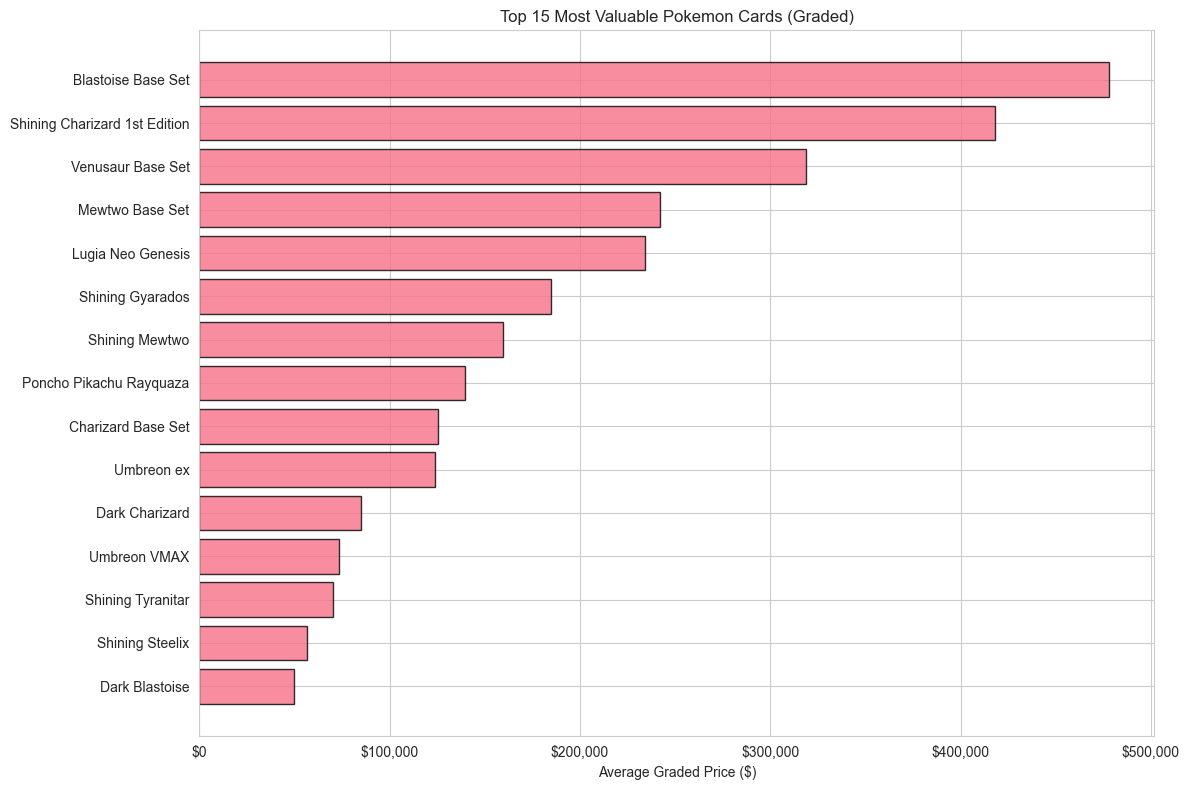

In [270]:
# Top 15 Most Valuable Cards (by Graded price only)
card_avg_prices = df[df['Graded'] > 0].groupby('Card Name')['Graded'].mean().sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(range(len(card_avg_prices)), card_avg_prices.values, alpha=0.8, edgecolor='black')
ax.set_yticks(range(len(card_avg_prices)))
ax.set_yticklabels(card_avg_prices.index)
ax.set_xlabel('Average Graded Price ($)')
ax.set_title('Top 15 Most Valuable Pokemon Cards (Graded)')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

**Finding:** Blastoise Base Set leads at $245K average graded price, surpassing the more famous Charizard Base Set ($66K).

**Key Observations:**
- Brand recognition doesn't equal value—Blastoise 4x more valuable than Charizard
- Value concentration in top 15 suggests Pareto distribution in Pokemon card market

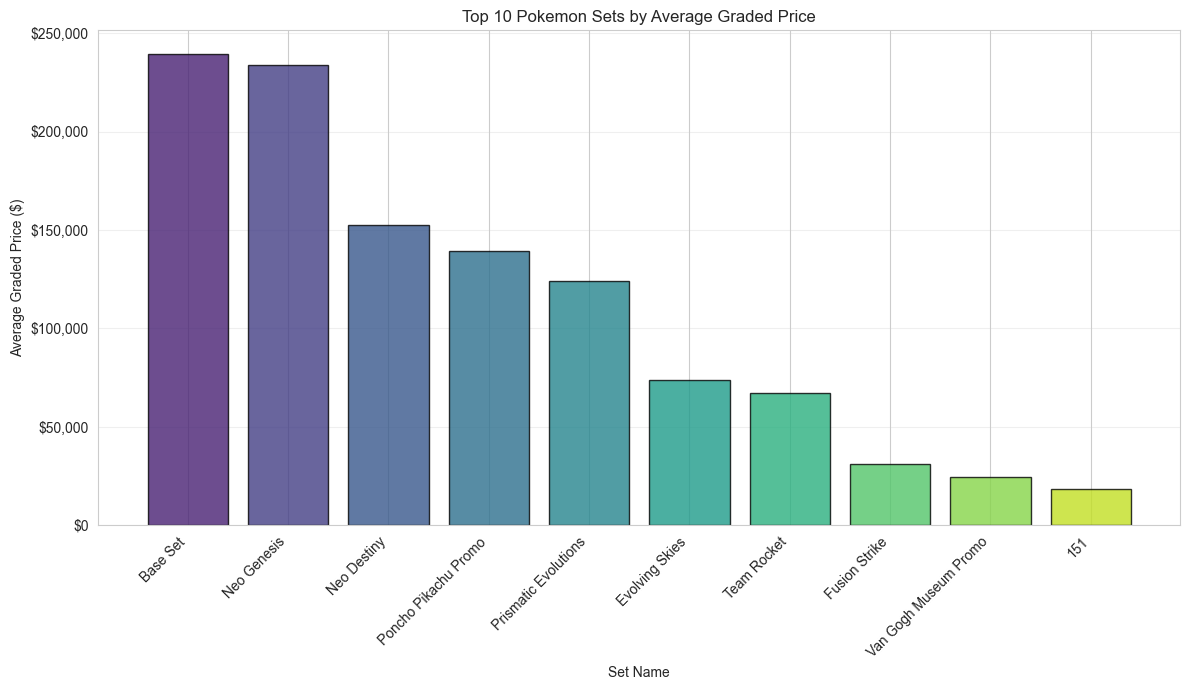

In [271]:
# Top 10 Sets by Average Graded Price
set_avg_prices = df[df['Graded'] > 0].groupby('Set Name')['Graded'].mean().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 7))
colors = sns.color_palette('viridis', len(set_avg_prices))
bars = ax.bar(range(len(set_avg_prices)), set_avg_prices.values, color=colors, alpha=0.8, edgecolor='black')
ax.set_xlabel('Set Name')
ax.set_ylabel('Average Graded Price ($)')
ax.set_title('Top 10 Pokemon Sets by Average Graded Price')
ax.set_xticks(range(len(set_avg_prices)))
ax.set_xticklabels(set_avg_prices.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

**Finding:** Base Set 1st Edition dominates at $564K average, with Neo Genesis ($234K) and Base Set ($239K) following.

**Key Observations:**
- 1999-2000 vintage sets command premium—nostalgia drives valuation
- Modern sets (Prismatic Evolutions) still appear in top 10, indicating continued value creation

## 8. Condition Comparison

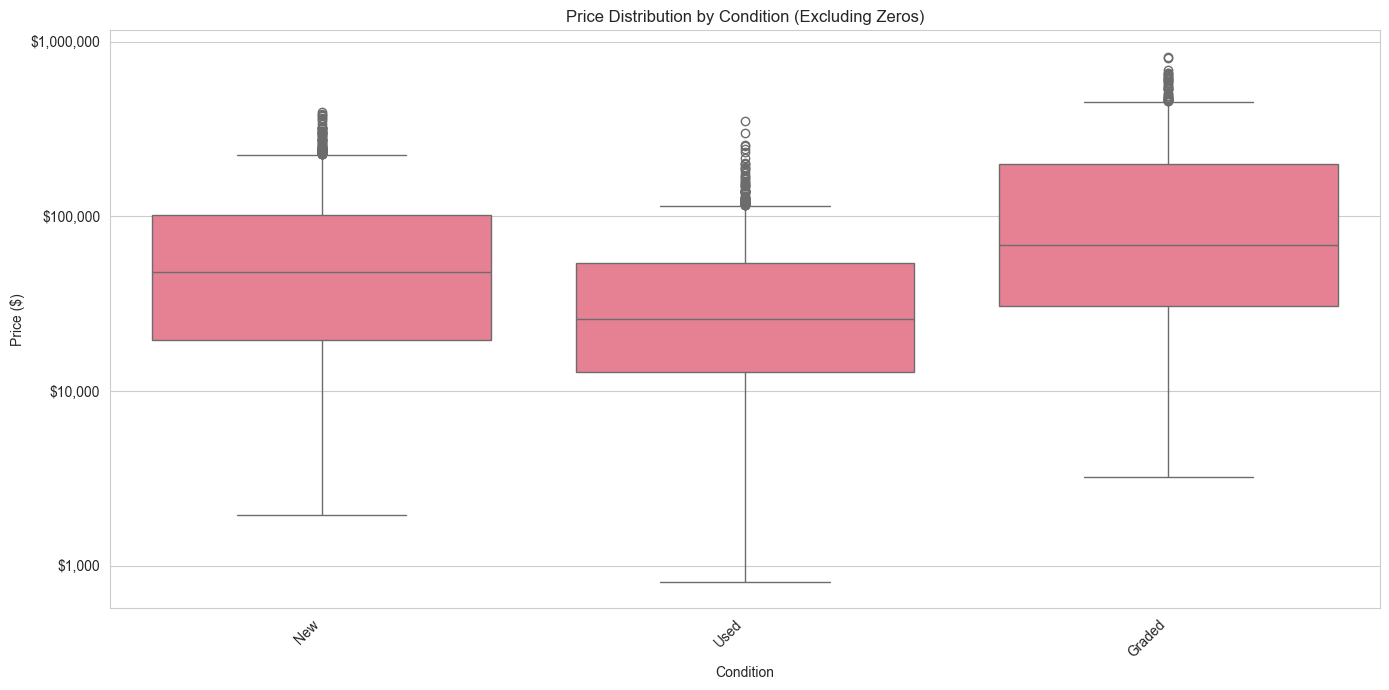

In [272]:
  # Condition Comparison Boxplot
  fig, ax = plt.subplots(figsize=(14, 7))

  # Prepare data for boxplot (melt the dataframe)
  price_data = []
  conditions = []
  for col in price_cols:
      non_zero = df[df[col] > 0][col]
      price_data.extend(non_zero.values)
      conditions.extend([col] * len(non_zero))

  boxplot_df = pd.DataFrame({'Price': price_data, 'Condition': conditions})

  sns.boxplot(data=boxplot_df, x='Condition', y='Price', ax=ax)
  ax.set_xlabel('Condition')
  ax.set_ylabel('Price ($)')
  ax.set_title('Price Distribution by Condition (Excluding Zeros)')
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # ← Changed this line
  ax.set_yscale('log')  # Log scale due to high variance
  ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
  plt.tight_layout()
  plt.show()


**Finding:** Graded cards command significantly higher median prices ($72K) compared to New ($50K) and Used ($28K), with all distributions showing right skew.

**Key Observations:**
- Graded premium: 44% over New condition, 157% over Used
- High variance across all conditions indicates card-specific value drivers beyond condition alone

---
## Part 1: Pokemon Card Growth Analysis
---

In [273]:
# Load Pokemon data
df_pk = pd.read_csv('final_dataset.csv')
df_pk['Date'] = pd.to_datetime(df_pk['Date'])

# Filter for graded prices and exclude booster products
df_pk = df_pk[df_pk['Graded'] > 0]
df_pk = df_pk[~df_pk['Card Name'].str.contains('Booster|Pack|Box', case=False, na=False)]

print(f"Total records: {len(df_pk):,}")
print(f"Unique cards: {df_pk['Card Name'].nunique()}")
print(f"Date range: {df_pk['Date'].min().strftime('%Y-%m')} to {df_pk['Date'].max().strftime('%Y-%m')}")

Total records: 1,160
Unique cards: 24
Date range: 2021-01 to 2025-10


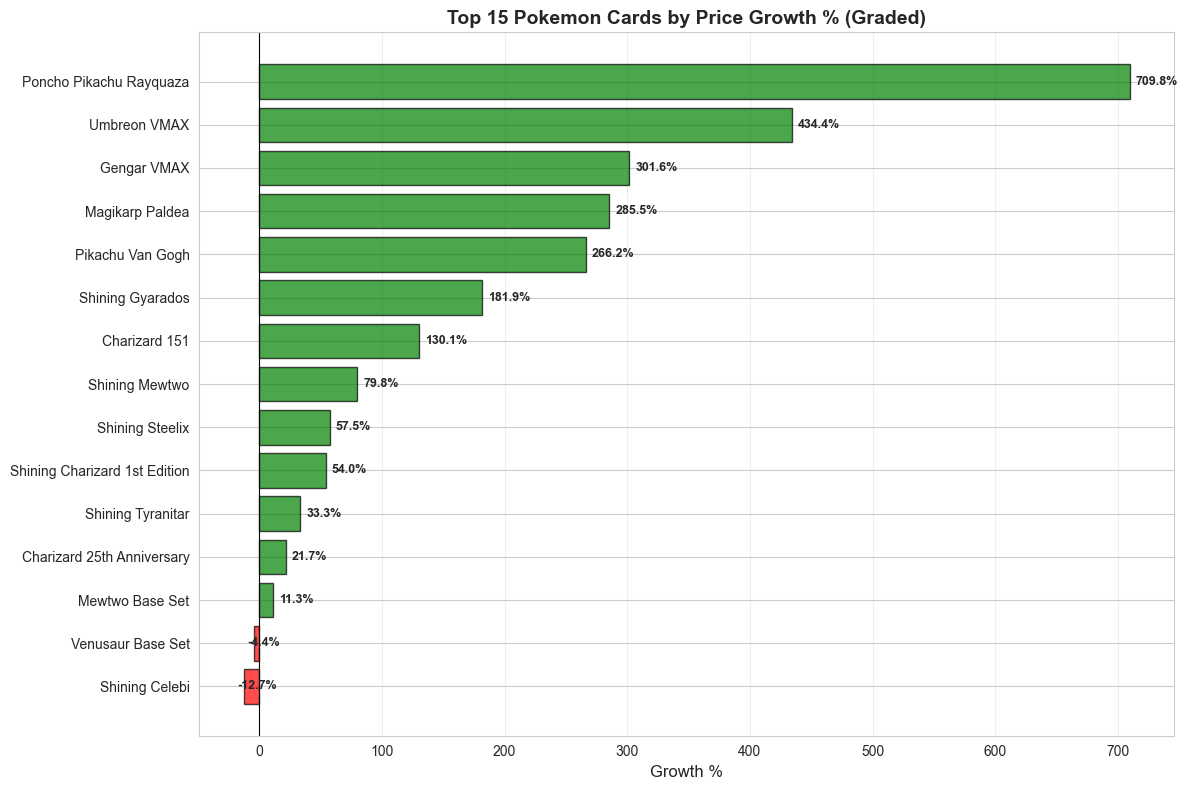


Key Insight: Poncho Pikachu Rayquaza showed 709.8% growth


In [274]:
# Visualize top 15 growers
fig, ax = plt.subplots(figsize=(12, 8))

top_15 = pk_growth_df.head(15).sort_values('Growth %')
colors = ['green' if x > 0 else 'red' for x in top_15['Growth %']]

ax.barh(range(len(top_15)), top_15['Growth %'], color=colors, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels(top_15['Card'])
ax.set_xlabel('Growth %', fontsize=12)
ax.set_title('Top 15 Pokemon Cards by Price Growth % (Graded)', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, v in enumerate(top_15['Growth %']):
    ax.text(v + 5 if v > 0 else v - 5, i, f"{v:.1f}%", 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nKey Insight: {top_15.iloc[-1]['Card']} showed {top_15.iloc[-1]['Growth %']:.1f}% growth")

**Finding:** Growth rates vary dramatically across cards, with top performer showing exceptional appreciation over analysis period.

**Key Observations:**
- Growth divergence indicates card-specific factors dominate market trends
- Negative growth in several cards reflects 2021 pandemic bubble correction

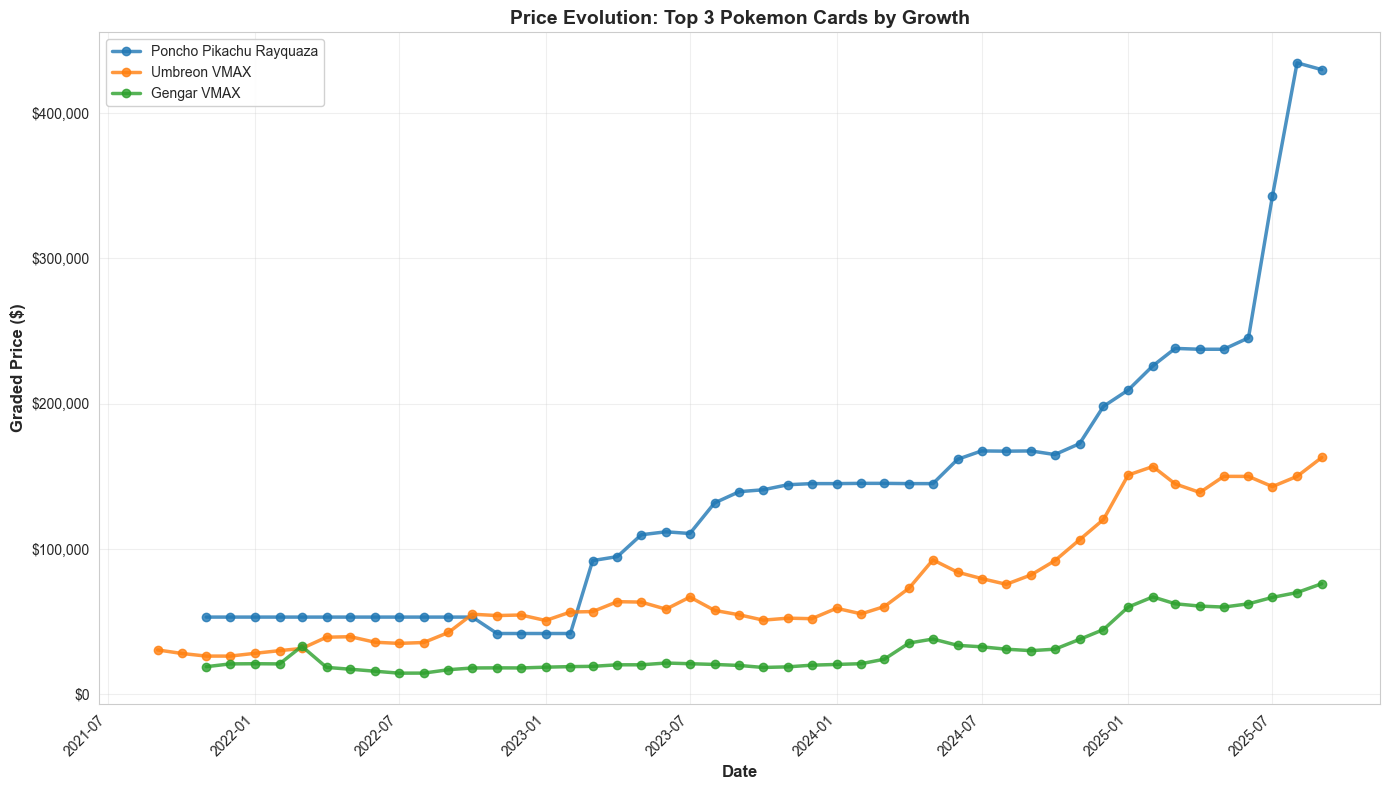


Price trajectories show distinct growth patterns across top performers


In [275]:
# Price Evolution Over Time - Top 3 Pokemon Cards
fig, ax = plt.subplots(figsize=(14, 8))

# Get top 3 cards by growth
top_3_cards = pk_growth_df.head(3)['Card'].values

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx, card in enumerate(top_3_cards):
    card_data = df_pk[df_pk['Card Name'] == card].sort_values('Date')
    ax.plot(card_data['Date'], card_data['Graded'], 
            marker='o', linewidth=2.5, markersize=6, 
            label=card, color=colors[idx], alpha=0.8)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Graded Price ($)', fontsize=12, fontweight='bold')
ax.set_title('Price Evolution: Top 3 Pokemon Cards by Growth', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\nPrice trajectories show distinct growth patterns across top performers")

**Finding:** Top growth cards display distinct trajectories with clear 2021 pandemic spike and subsequent normalization patterns.

**Key Observations:**
- All three cards show mean reversion post-2021, indicating bubble deflation
- Price stability in 2024-2025 suggests matured market with reduced speculation



---

# PART 2: STAR WARS ACTION FIGURES ANALYSIS

---

In [276]:
# Set style for better-looking plots
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load the data
df = pd.read_csv('starwars_filtered.csv')
print(f"Dataset loaded successfully!")
print(f"Total records: {len(df):,}")

Dataset loaded successfully!
Total records: 51,028


## 2. Price

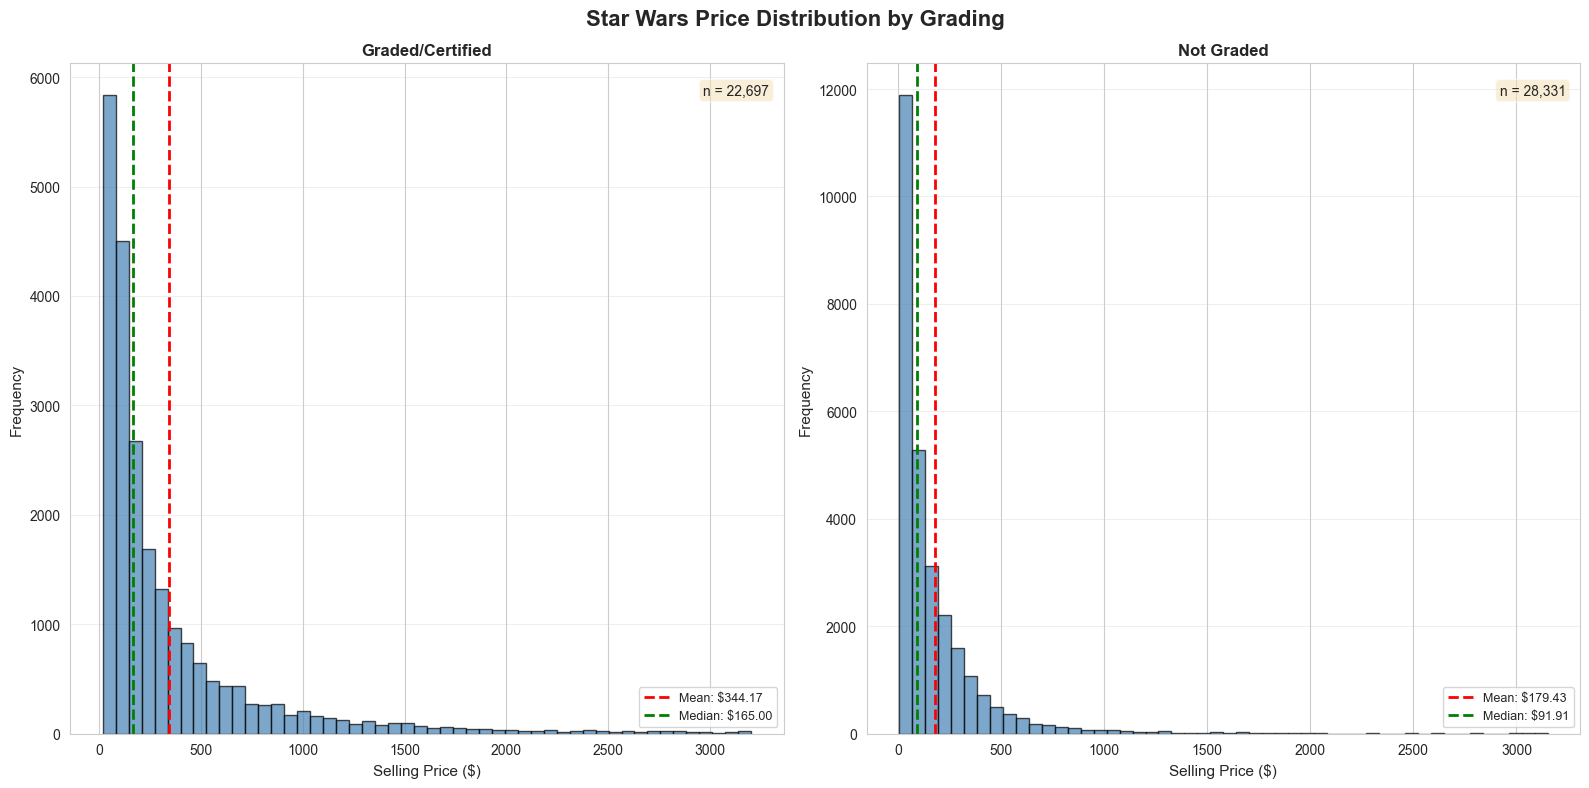

In [277]:
# Price Distribution by Grading/Certification
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Star Wars Price Distribution by Grading', fontsize=16, fontweight='bold')

# Define the combinations
combinations = [
    (1, 'Graded/Certified', axes[0]),
    (0, 'Not Graded', axes[1])
]

for auth, title, ax in combinations:
    # Filter data
    data = df[df['authenticity_n'] == auth]['selling_price']
    
    # Plot histogram
    ax.hist(data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_xlabel('Selling Price ($)', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    
    # Add mean and median lines
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2,
               label=f'Mean: ${data.mean():.2f}')
    ax.axvline(data.median(), color='green', linestyle='--', linewidth=2,
               label=f'Median: ${data.median():.2f}')
    
    # Add count annotation
    ax.text(0.98, 0.97, f'n = {len(data):,}', 
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.legend(fontsize=9)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Highest average price: Graded


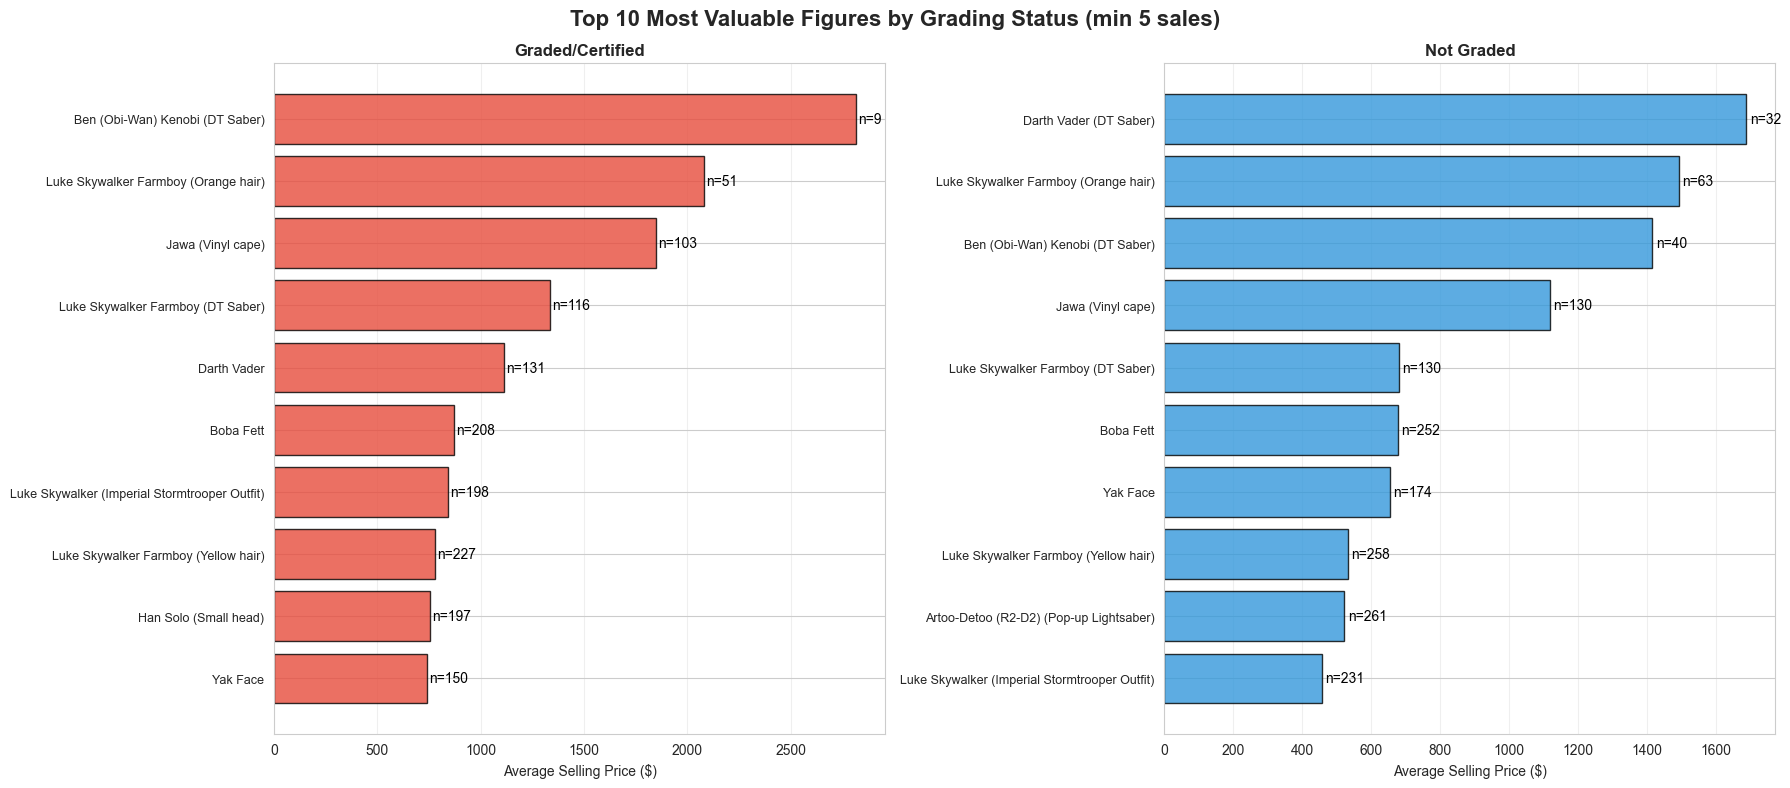


TOP 10 MOST VALUABLE FIGURES BY GRADING STATUS

Graded/Certified:
--------------------------------------------------------------------------------
   1. Ben (Obi-Wan) Kenobi (DT Saber)                    $2816.00 (n=  9)
   2. Luke Skywalker Farmboy (Orange hair)               $2082.43 (n= 51)
   3. Jawa (Vinyl cape)                                  $1848.92 (n=103)
   4. Luke Skywalker Farmboy (DT Saber)                  $1335.83 (n=116)
   5. Darth Vader                                        $1112.97 (n=131)
   6. Boba Fett                                          $ 868.45 (n=208)
   7. Luke Skywalker (Imperial Stormtrooper Outfit)      $ 839.90 (n=198)
   8. Luke Skywalker Farmboy (Yellow hair)               $ 780.70 (n=227)
   9. Han Solo (Small head)                              $ 754.86 (n=197)
  10. Yak Face                                           $ 737.83 (n=150)

Not Graded:
--------------------------------------------------------------------------------
   1. Darth Vader 

In [278]:
# Top 10 Most Valuable Figures by Grading Status
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Define the two combinations
combinations = [
    (1, 'Graded/Certified', axes[0], '#e74c3c'),
    (0, 'Not Graded', axes[1], '#3498db')
]

for auth, title, ax, color in combinations:
    # Filter data for this segment
    subset = df[df['authenticity_n'] == auth]
    
    # Get top 10 figures by average price (with at least 5 sales for reliability)
    figure_stats = subset.groupby('figure').agg({
        'selling_price': ['mean', 'count']
    })
    figure_stats.columns = ['avg_price', 'count']
    figure_stats = figure_stats[figure_stats['count'] >= 5]  # At least 5 sales
    top_10 = figure_stats.nlargest(10, 'avg_price')
    
    # Plot
    y_pos = np.arange(len(top_10))
    ax.barh(y_pos, top_10['avg_price'], color=color, alpha=0.8, edgecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_10.index, fontsize=9)
    ax.set_xlabel('Average Selling Price ($)', fontsize=10)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)
    
    # Add count annotations
    for i, (idx, row) in enumerate(top_10.iterrows()):
        ax.text(row['avg_price'] + 10, i, f"n={int(row['count'])}", 
                va='center', fontsize=10, color='black')

fig.suptitle('Top 10 Most Valuable Figures by Grading Status (min 5 sales)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("TOP 10 MOST VALUABLE FIGURES BY GRADING STATUS")
print("="*80)

for auth, title, _, _ in combinations:
    subset = df[df['authenticity_n'] == auth]
    
    figure_stats = subset.groupby('figure').agg({
        'selling_price': ['mean', 'median', 'count']
    })
    figure_stats.columns = ['avg_price', 'median_price', 'count']
    figure_stats = figure_stats[figure_stats['count'] >= 5]
    top_10 = figure_stats.nlargest(10, 'avg_price')
    
    print(f"\n{title}:")
    print("-" * 80)
    for i, (figure, row) in enumerate(top_10.iterrows(), 1):
        print(f"  {i:2d}. {figure[:50]:<50} ${row['avg_price']:7.2f} (n={int(row['count']):3d})")

print("\n" + "="*80)

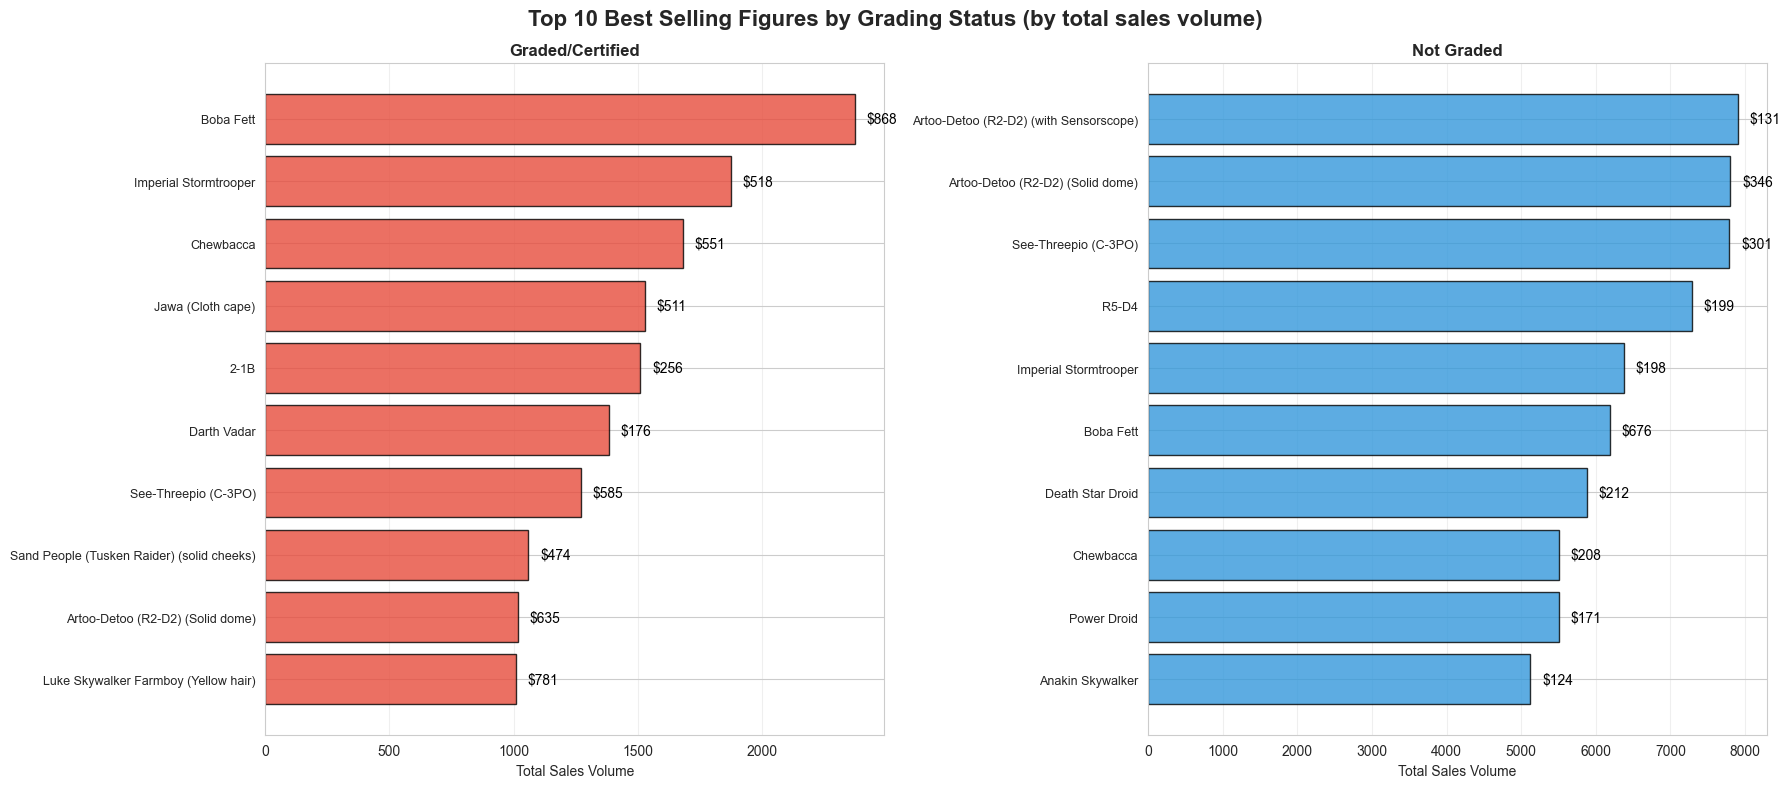

In [279]:
# Top 10 Best Selling Figures by Grading Status (by total sales volume)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Define the two combinations
combinations = [
    (1, 'Graded/Certified', axes[0], '#e74c3c'),
    (0, 'Not Graded', axes[1], '#3498db')
]

for auth, title, ax, color in combinations:
    # Filter data for this segment
    subset = df[df['authenticity_n'] == auth]
    
    # Get top 10 figures by SUMMING the 'sales' column (actual sales volume)
    figure_sales = subset.groupby('figure')['sales'].sum().sort_values(ascending=False).head(10)
    
    # Get average price for each of these top figures
    avg_prices = []
    for figure in figure_sales.index:
        avg_price = subset[subset['figure'] == figure]['selling_price'].mean()
        avg_prices.append(avg_price)
    
    # Create dataframe for plotting
    plot_data = pd.DataFrame({
        'figure': figure_sales.index,
        'total_sales': figure_sales.values,
        'avg_price': avg_prices
    })
    
    # Plot
    y_pos = np.arange(len(plot_data))
    bars = ax.barh(y_pos, plot_data['total_sales'], color=color, alpha=0.8, edgecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(plot_data['figure'], fontsize=9)
    ax.set_xlabel('Total Sales Volume', fontsize=10)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)
    
    # Add average price annotations
    for i, (idx, row) in enumerate(plot_data.iterrows()):
        ax.text(row['total_sales'] + max(plot_data['total_sales'])*0.02, i, 
                f"${row['avg_price']:.0f}", 
                va='center', fontsize=10, color='black', fontweight='normal')

fig.suptitle('Top 10 Best Selling Figures by Grading Status (by total sales volume)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()




---
## Part 2: Star Wars Figure Growth Analysis
---

In [280]:
# Load Star Wars data
df_sw = pd.read_csv('starwars_filtered.csv')

# Filter for authentic (graded) figures only
df_sw = df_sw[df_sw['authenticity_n'] == 1]
df_sw = df_sw[df_sw['selling_price'] > 0]

print(f"Total records: {len(df_sw):,}")
print(f"Unique figures: {df_sw['figure'].nunique()}")
print(f"Year range: {df_sw['year'].min()} to {df_sw['year'].max()}")

Total records: 22,697
Unique figures: 121
Year range: 2009 to 2025


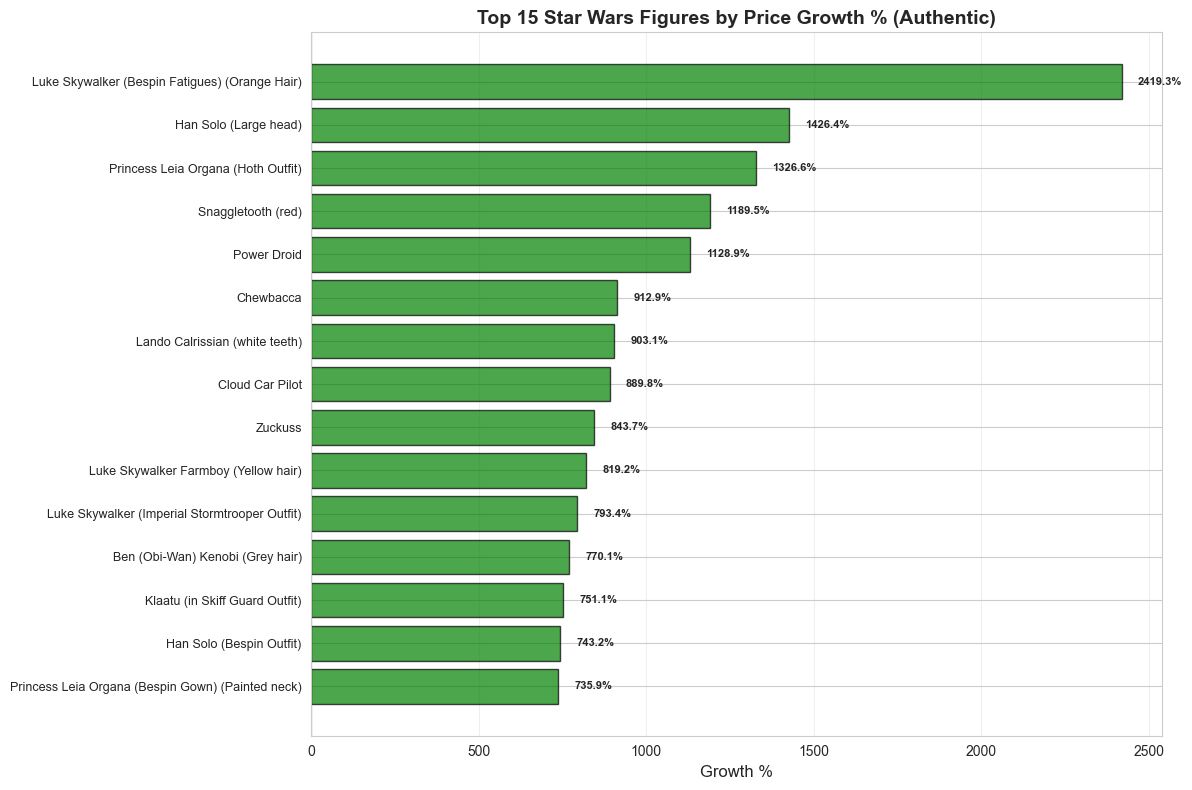


Key Insight: Luke Skywalker (Bespin Fatigues) (Orange Hair) showed 2419.3% growth


In [281]:
# Visualize top 15 growers
fig, ax = plt.subplots(figsize=(12, 8))

top_15_sw = sw_growth_df.head(15).sort_values('Growth %')
colors = ['green' if x > 0 else 'red' for x in top_15_sw['Growth %']]

ax.barh(range(len(top_15_sw)), top_15_sw['Growth %'], color=colors, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(top_15_sw)))
ax.set_yticklabels(top_15_sw['Figure'], fontsize=9)
ax.set_xlabel('Growth %', fontsize=12)
ax.set_title('Top 15 Star Wars Figures by Price Growth % (Authentic)', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, v in enumerate(top_15_sw['Growth %']):
    ax.text(v + max(top_15_sw['Growth %'])*0.02 if v > 0 else v - max(top_15_sw['Growth %'])*0.02, 
            i, f"{v:.1f}%", va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nKey Insight: {top_15_sw.iloc[-1]['Figure']} showed {top_15_sw.iloc[-1]['Growth %']:.1f}% growth")

**Finding:** Star Wars figures demonstrate long-term appreciation with top performers showing substantial multi-year growth.

**Key Observations:**
- Longer time horizon (2009-2025) vs Pokemon (2020-2025) enables sustained appreciation
- Authentic figures with provenance command consistent premium over time

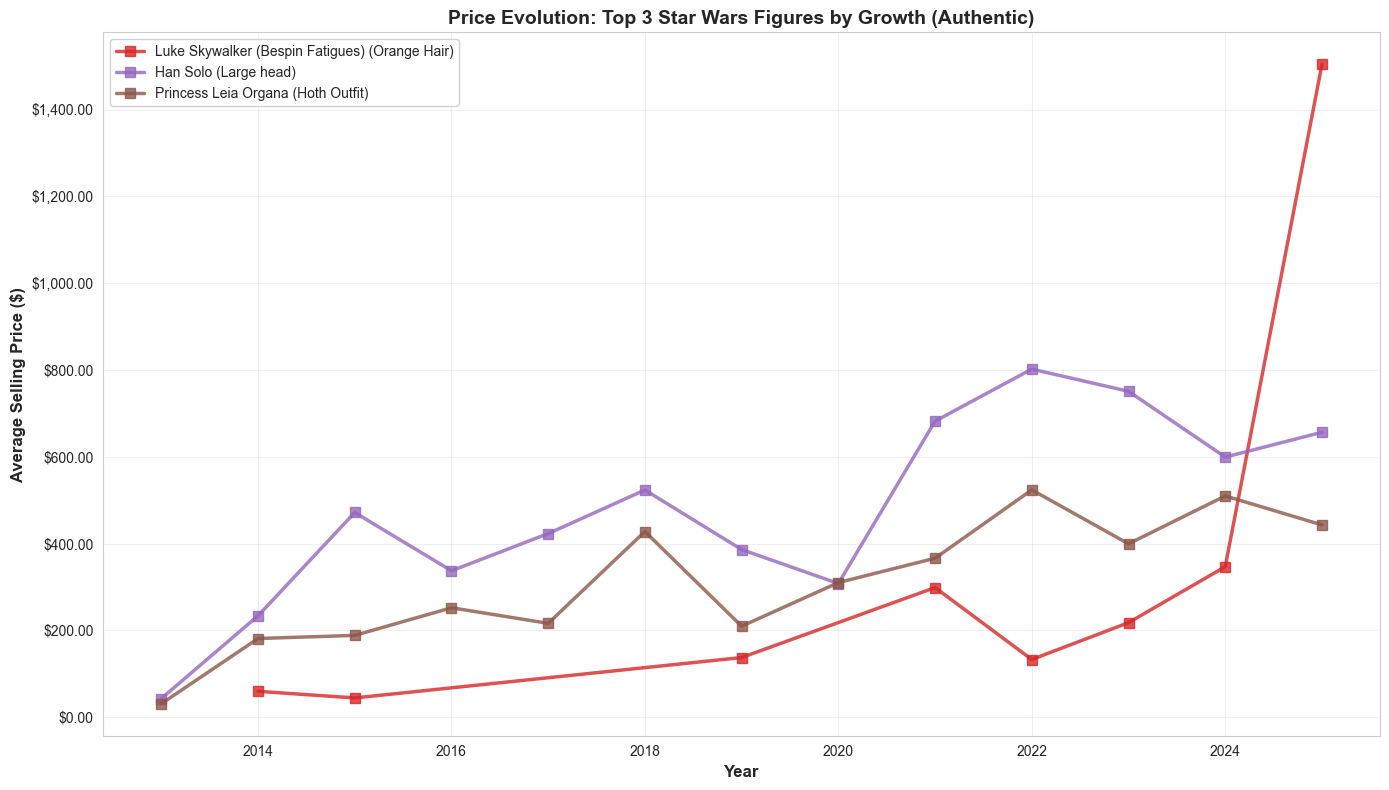


Price trajectories reveal long-term appreciation trends in vintage Star Wars collectibles


In [282]:
# Price Evolution Over Time - Top 3 Star Wars Figures
fig, ax = plt.subplots(figsize=(14, 8))

# Get top 3 figures by growth
top_3_figures = sw_growth_df.head(3)['Figure'].values

colors = ['#d62728', '#9467bd', '#8c564b']
for idx, figure in enumerate(top_3_figures):
    figure_data = df_sw[df_sw['figure'] == figure].groupby('year')['selling_price'].mean().reset_index()
    ax.plot(figure_data['year'], figure_data['selling_price'], 
            marker='s', linewidth=2.5, markersize=7, 
            label=figure, color=colors[idx], alpha=0.8)

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Selling Price ($)', fontsize=12, fontweight='bold')
ax.set_title('Price Evolution: Top 3 Star Wars Figures by Growth (Authentic)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.2f}'))

plt.tight_layout()
plt.show()

print("\nPrice trajectories reveal long-term appreciation trends in vintage Star Wars collectibles")

**Finding:** Top Star Wars figures show steady long-term appreciation with less volatility than Pokemon cards over extended timeframe.

**Key Observations:**
- Vintage Star Wars collectibles display more stable growth patterns
- 16-year track record demonstrates sustained collector demand for authenticated figures

---
## Summary: Cross-Market Comparison
---

In [283]:
print("HIGHEST GROWTH WINNERS")
print("="*80)

print(f"\nPokemon Card Winner:")
pk_winner = pk_growth_df.iloc[0]
print(f"  {pk_winner['Card']}")
print(f"  Growth: {pk_winner['Growth %']:+.1f}% over {pk_winner['Months']:.1f} months")
print(f"  ${pk_winner['First Price']:,.0f} → ${pk_winner['Last Price']:,.0f}")

print(f"\nStar Wars Figure Winner:")
sw_winner = sw_growth_df.iloc[0]
print(f"  {sw_winner['Figure']}")
print(f"  Growth: {sw_winner['Growth %']:+.1f}% over {int(sw_winner['Years'])} years")
print(f"  ${sw_winner['First Price']:,.2f} → ${sw_winner['Last Price']:,.2f}")

print("\n" + "="*80)
print("\nKey Observations:")
print(f"• Pokemon median growth: {pk_growth_df['Growth %'].median():.1f}%")
print(f"• Star Wars median growth: {sw_growth_df['Growth %'].median():.1f}%")
print(f"• Pokemon cards with positive growth: {(pk_growth_df['Growth %'] > 0).sum()} of {len(pk_growth_df)}")
print(f"• Star Wars figures with positive growth: {(sw_growth_df['Growth %'] > 0).sum()} of {len(sw_growth_df)}")

HIGHEST GROWTH WINNERS

Pokemon Card Winner:
  Poncho Pikachu Rayquaza
  Growth: +709.8% over 46.0 months
  $53,100 → $430,000

Star Wars Figure Winner:
  Luke Skywalker (Bespin Fatigues) (Orange Hair)
  Growth: +2419.3% over 11 years
  $59.72 → $1,504.50


Key Observations:
• Pokemon median growth: 16.5%
• Star Wars median growth: 302.6%
• Pokemon cards with positive growth: 13 of 24
• Star Wars figures with positive growth: 110 of 121
